Este exemplo leva como base o exemplo já incluído no próprio simulador netsquid, apenas organizei e localizei de uma forma mais simples para que todos consigam entender

### Importando as bibliotecas necessárias

In [1]:
import netsquid as ns
from netsquid.examples.purify import example_network_setup, example_sim_setup
from matplotlib import pyplot as plt
print(f"Este exemplo está localizado em: {ns.examples.purify.__file__}")


Este exemplo está localizado em: /home/arthur/Documents/Arthur/Ufpa/Gercom/Quantum/NetSquid-Examples/.venv/lib/python3.10/site-packages/netsquid/examples/purify.py


### Criando a classe do simulador

In [2]:
class Simulation:
    def __init__(self, source_delay: float = 1e5, source_fidelity_sq: float = 0.8, depolar_rate: float = 1000,
                  node_distance: int = 1000, num_runs: int = 1000) -> None:
        # Cria uma rede para fins dos testes de fidelidade utilizando os parâmetros desejados
        self.network = example_network_setup(source_delay= source_delay, source_fidelity_sq= source_fidelity_sq, 
                                        depolar_rate= depolar_rate, node_distance= node_distance)
        # Cria o setup do exemplo capaz de rodar a simulação
        self.filt_example, self.dc = example_sim_setup(
            self.network.get_node("node_A"), self.network.get_node("node_B"), num_runs=num_runs)
    
    def start_Simulation(self) -> None:
        self.filt_example.start()
        ns.sim_run()
        self.fidelity = self.dc.dataframe["F2"].mean()
        print(f"A taxa de fidelidade foi de: {self.fidelity}")

    def returnFidelity(self) -> float:
        return self.fidelity


In [3]:
class Graphic:
    def __init__(self, simulation: Simulation, data_file_name: str = 'fidelitydata.txt') -> None:
        self.fidelity_axis = []
        self.data_count = 0
        self.y_label = 'Fidelity'
        self.x_label = 'Execution number'
        self.file_name = data_file_name
        self.fidelity = simulation.returnFidelity()


    def testFile(self, create_file: bool=True) -> bool:
        try:
            with open(self.file_name, 'r') as file:
                return True
            
        except:
            if create_file:
                with open(self.file_name, 'w+'):
                    print(f'Nenhum arquivo encontrado. Criado o arquivo "{self.file_name}"')
            return False
    

    def deleteData(self) -> None:
        test = self.testFile(False)
        if test:
            with open(self.file_name, 'w') as file:
                print("Dados apagados com sucesso")
                return
            
        print("Sem dados para apagar")

    def readDataCollector(self) -> None:
        test = self.testFile()
        if test:
            with open(self.file_name, 'r') as file:
                temp_list = []
                temp_count = 0
                for line in file:
                    if line != None:
                        temp_list.append(float(line.replace('\n', '')))
                        temp_count += 1
                self.fidelity_axis = temp_list
                self.data_count = temp_count
                return
        
        print('Nenhum dado existente')
        return
    
        
    def addOnDataCollector(self) -> None:
        self.testFile()
        with open(self.file_name, '+a') as file:
            file.write(f'{self.fidelity}\n')
            
    
    def printData(self) -> None:
        test = self.testFile()
        if test:
            print("Os dados são: ")
            with open(self.file_name, 'r') as file:
                for line in file:
                    print(line)
                return
        
        print("Nenhum dado pôde ser imprimido")
        return


    def generateGraph(self) -> None:
        plt.plot(self.fidelity_axis, scalex=self.data_count)
        plt.ylabel(self.y_label)
        plt.xlabel(self.x_label)
        plt.show()



### Rodando o simulador

A taxa de fidelidade foi de: 0.2525


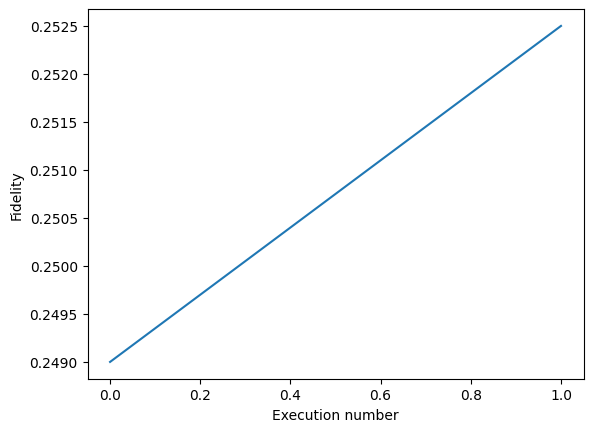

Os dados são: 
0.249

0.2525



In [4]:
# Nesse simulador você tem a possibilidade de alterar os parâmetros para diferentes testes e dados
simulator = Simulation()
simulator.start_Simulation()
graphic = Graphic(simulation=simulator)
graphic.addOnDataCollector()
resp = input("Você gostaria de observar o gráfico dos dados? [s/n] ").split()
if resp[0] in 'Ss':
    graphic.readDataCollector()
    graphic.generateGraph()
    graphic.printData()
    resp = input("Deseja apagar todos os dados salvos? [s/n] ").split()
    if resp[0] in 'sS':
        graphic.deleteData()

else:
    print("Simulação finalizada com sucesso")
